In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('bank.csv')

In [5]:
data


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [7]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [11]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [13]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [15]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [17]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [19]:
data['job']=LE.fit_transform(data['job'])
data['marital']=LE.fit_transform(data['marital'])
data['education']=LE.fit_transform(data['education'])
data['default']=LE.fit_transform(data['default'])
data['housing']=LE.fit_transform(data['housing'])
data['loan']=LE.fit_transform(data['loan'])
data['contact']=LE.fit_transform(data['contact'])
data['month']=LE.fit_transform(data['month'])
data['poutcome']=LE.fit_transform(data['poutcome'])
data['deposit']=LE.fit_transform(data['deposit'])

In [21]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


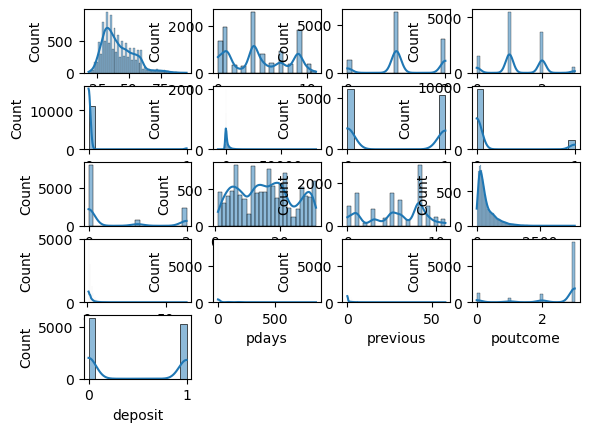

In [23]:
plt.figure()
plotnumber=1
for column in data.columns:
    ax=plt.subplot(5,4,plotnumber)
    sns.histplot(x=data[column],kde=True)
    plt.xlabel(column)
    plotnumber+=1

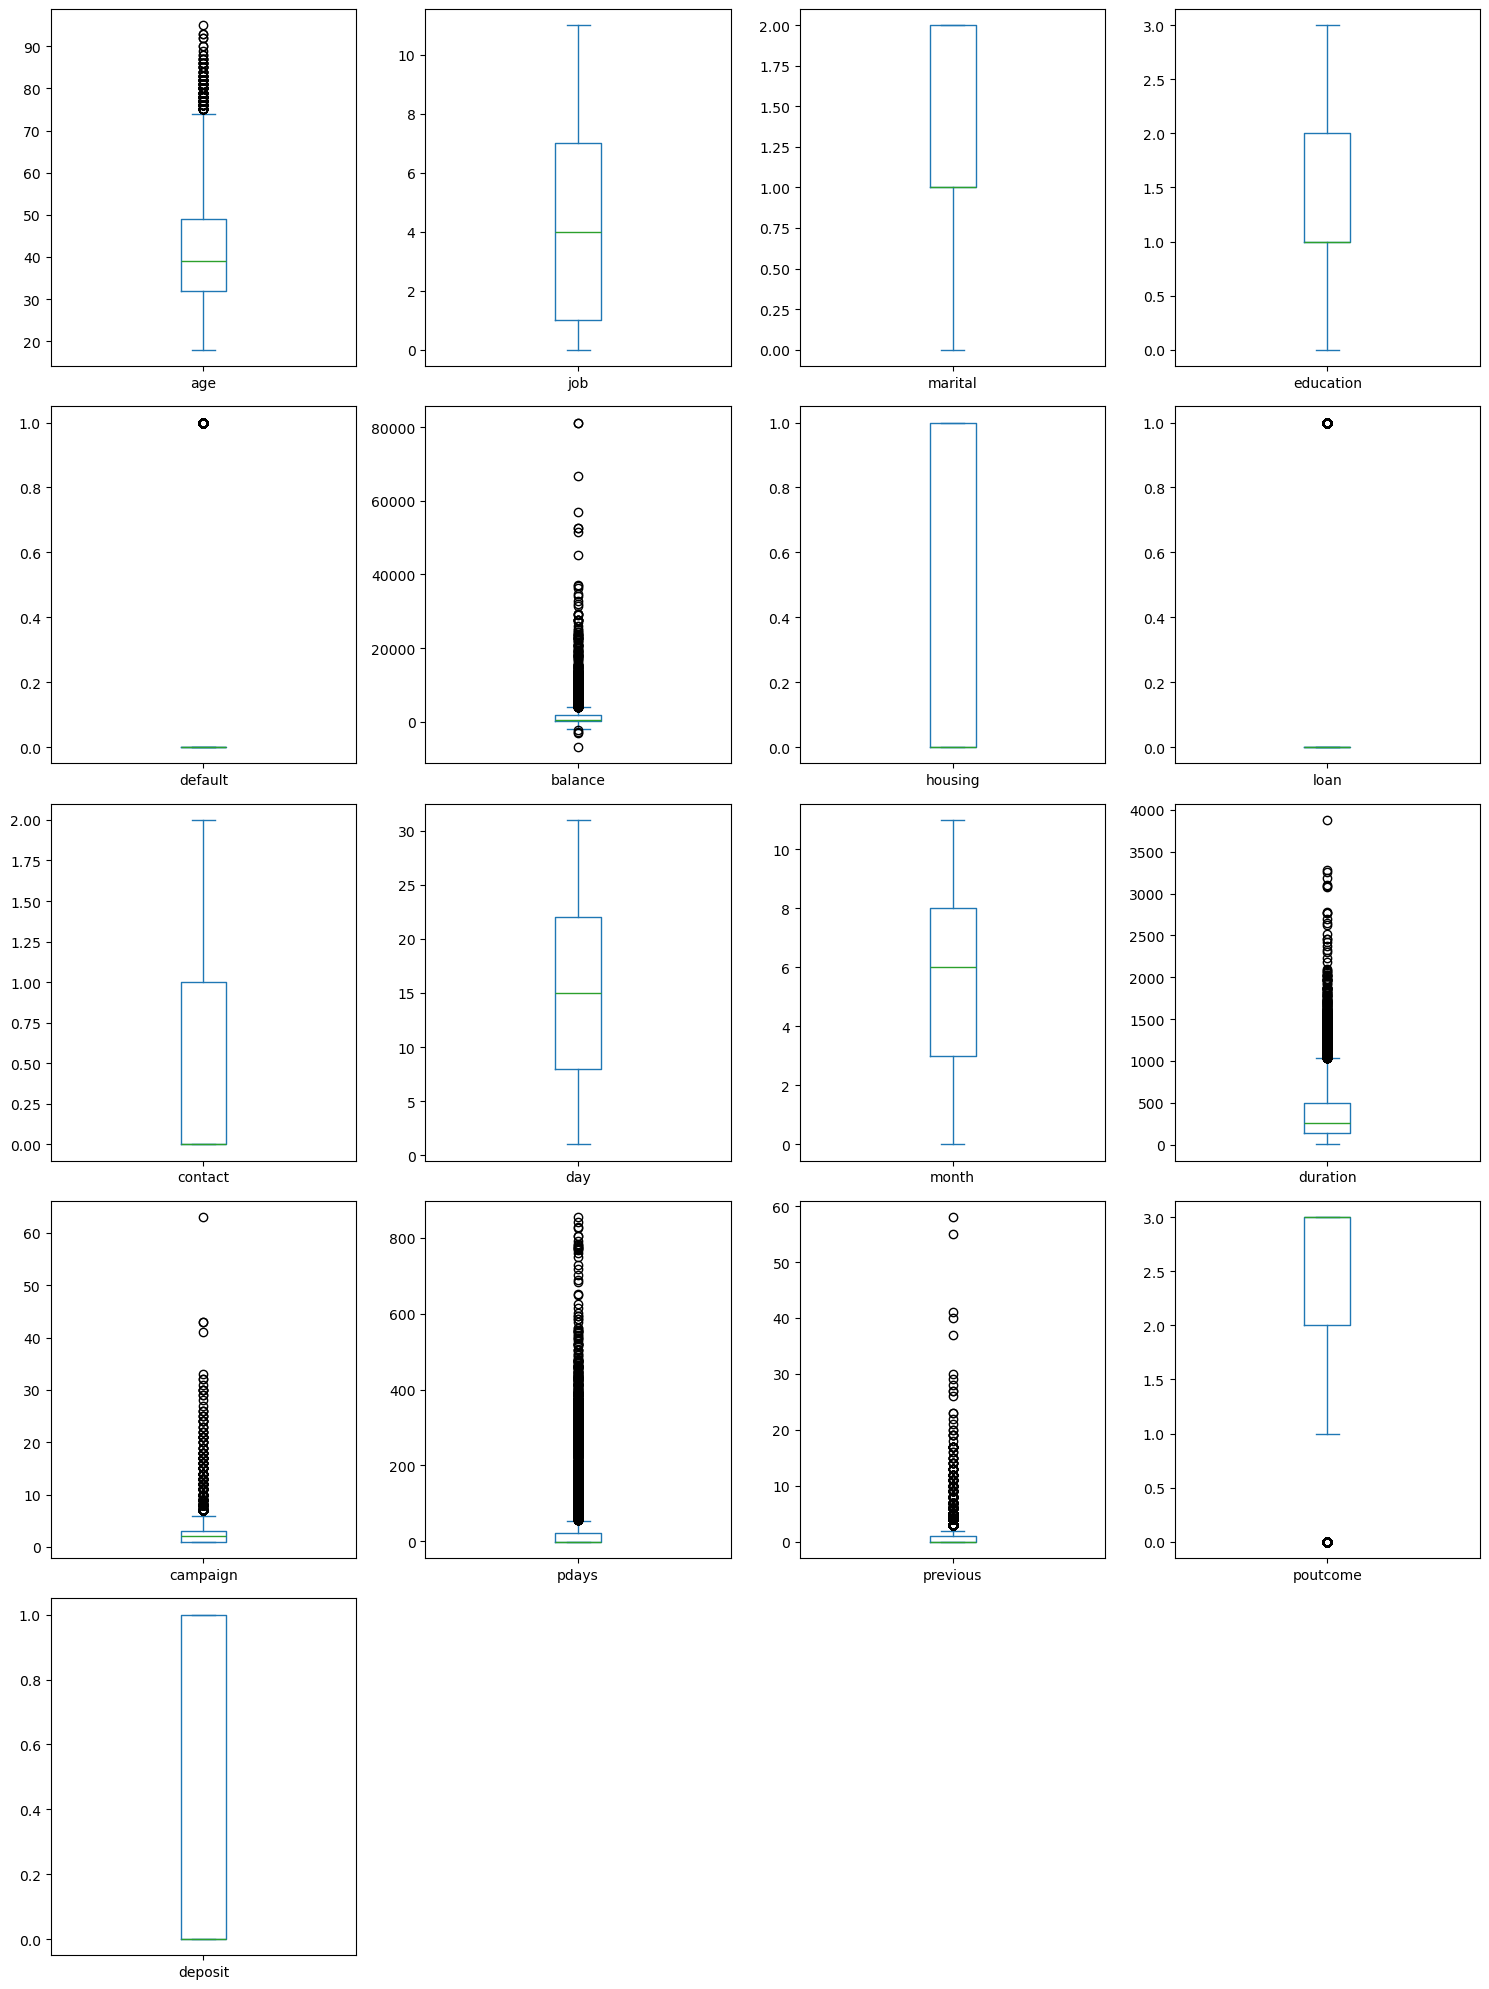

In [24]:
data.plot(kind='box',subplots=True,layout=(5,4),figsize=(15,20),sharex=False,sharey=False)
plt.tight_layout()
plt.show()

In [27]:
for fc in data.select_dtypes(include='number').columns:
  Q1=data[fc].quantile(0.25)
  Q3=data[fc].quantile(0.75)
  IQR=Q3-Q1
  lower_bond=Q1-1.5*IQR
  upper_bond=Q3+1.5*IQR
  df_removed = data[(data[fc] >= lower_bond) & (data[fc] <= upper_bond)]
  print("Original:\n", data)
print("\nAfter Removing Outliers:\n", df_removed)

Original:
        age  job  marital  education  default  balance  housing  loan  contact  \
0       59    0        1          1        0     2343        1     0        2   
1       56    0        1          1        0       45        0     0        2   
2       41    9        1          1        0     1270        1     0        2   
3       55    7        1          1        0     2476        1     0        2   
4       54    0        1          2        0      184        0     0        2   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
11157   33    1        2          0        0        1        1     0        0   
11158   39    7        1          1        0      733        0     0        2   
11159   32    9        2          1        0       29        0     0        0   
11160   43    9        1          1        0        0        0     1        0   
11161   34    9        1          1        0        0        0     0        0   

       day  mont

In [29]:
X=data.drop('deposit',axis=1)
y=data.deposit

In [31]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0


In [33]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int32

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [37]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
5304,60,5,1,1,0,8121,1,1,0,18,1,98,7,-1,0,3
7512,51,4,2,2,1,-55,1,0,0,11,8,281,2,266,6,0
4700,28,9,2,1,1,-1042,1,0,2,6,6,712,2,-1,0,3
4918,30,0,1,1,0,4457,1,0,0,21,9,566,4,-1,0,3
4450,31,9,2,1,0,2544,0,0,0,15,5,252,1,184,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,47,4,1,2,0,761,1,0,0,11,5,80,2,-1,0,3
5191,28,6,2,2,0,159,0,0,0,16,9,449,2,33,4,2
5390,35,9,1,1,0,1144,0,0,0,20,1,197,13,-1,0,3
860,51,5,1,2,0,746,0,0,0,25,1,372,5,-1,0,3


In [39]:
y_train

5304    0
7512    0
4700    1
4918    1
4450    1
       ..
5734    0
5191    1
5390    0
860     1
7270    0
Name: deposit, Length: 8371, dtype: int32

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42,n_jobs=-1)
rf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [42]:
y_pred1=rf.predict(X_test)

In [45]:
y_pred1

array([1, 1, 1, ..., 0, 0, 1])

In [47]:
from sklearn.metrics import accuracy_score,classification_report


In [49]:
accuracy1=accuracy_score(y_test,y_pred1)

In [51]:
accuracy1

0.8402006449301326

In [53]:
classification1=classification_report(y_test,y_pred1)

In [55]:
print(classification1)

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1450
           1       0.82      0.86      0.84      1341

    accuracy                           0.84      2791
   macro avg       0.84      0.84      0.84      2791
weighted avg       0.84      0.84      0.84      2791

